In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [215]:
df = pd.read_csv("user.csv")

In [216]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [217]:
df["Gender"] = df["Gender"].map({"Male":1,"Female":0})

In [218]:
df.drop("User ID",axis=1,inplace=True)

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

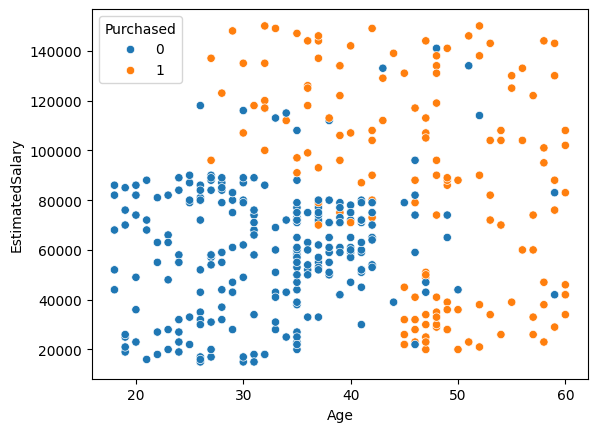

In [220]:
sns.scatterplot(df,x="Age",y="EstimatedSalary",hue="Purchased")

In [221]:
from sklearn.preprocessing import StandardScaler

In [222]:
sc = StandardScaler()

In [223]:
val = sc.fit_transform(df[["Age","EstimatedSalary"]])

In [224]:
df[["Age","EstimatedSalary"]] = val

In [225]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0
...,...,...,...,...
395,0,0.797057,-0.844019,1
396,1,1.274623,-1.372587,1
397,0,1.179110,-1.460681,1
398,1,-0.158074,-1.078938,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

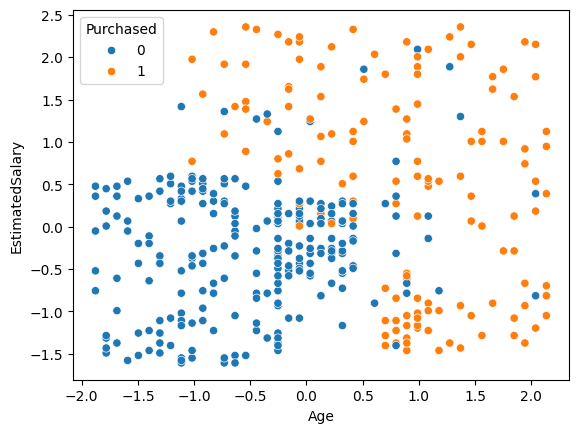

In [226]:
sns.scatterplot(df,x="Age",y="EstimatedSalary",hue="Purchased")

In [227]:
from sklearn.cluster import KMeans
kM = KMeans(n_clusters=2)

In [228]:
model = kM.fit(df[["Age","EstimatedSalary"]])
model

KMeans(n_clusters=2)

In [229]:
center= model.cluster_centers_
center

array([[ 0.66793746,  1.24496388],
       [-0.24704536, -0.46046609]])

In [230]:
val = model.labels_
val

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [231]:
df["Purchased"] = val

In [232]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,1
1,1,-0.253587,-1.460681,1
2,0,-1.113206,-0.785290,1
3,0,-1.017692,-0.374182,1
4,1,-1.781797,0.183751,1


Ploting the Graph

Method 1

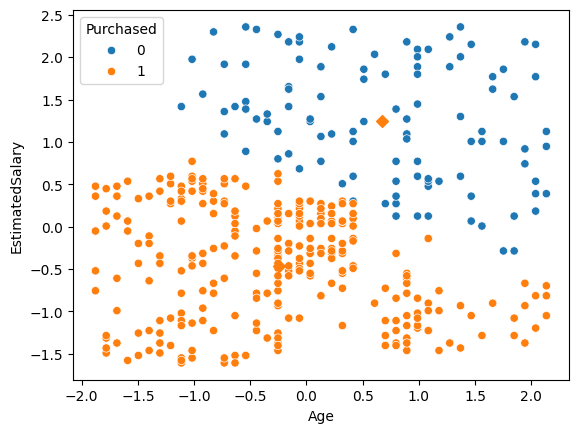

In [233]:
sns.scatterplot(df,x=df.loc[:,"Age"],y=df.loc[:,"EstimatedSalary"],hue="Purchased")
plt.scatter(center[:,0],center[:,1],marker = "D")

Method 2

In [234]:
df0 = df[df.loc[:,"Purchased"]==0]
df1 = df[df.loc[:,"Purchased"]==1]
df2 = df[df.loc[:,"Purchased"]==2]

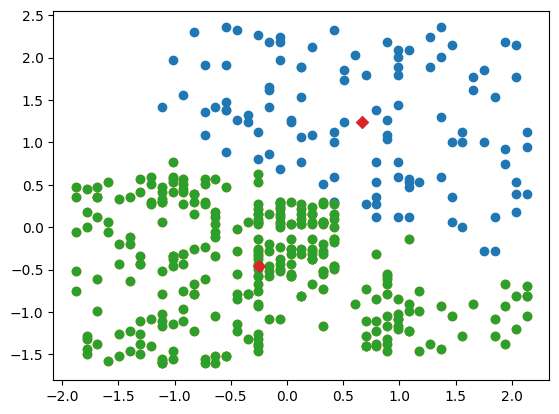

In [235]:
plt.scatter(df0.loc[:,"Age"],df0.loc[:,"EstimatedSalary"])
plt.scatter(df1.loc[:,"Age"],df1.loc[:,"EstimatedSalary"])
plt.scatter(df1.loc[:,"Age"],df1.loc[:,"EstimatedSalary"])
plt.scatter(center[:,0],center[:,1],marker="D")

Using Another Dataset

In [236]:
df1 = pd.read_csv("income.csv")
df1

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [238]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 660.0+ bytes


In [242]:
df1.drop("Name",axis=1,inplace=True)

In [243]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        22 non-null     int64
 1   Income($)  22 non-null     int64
dtypes: int64(2)
memory usage: 484.0 bytes


In [244]:
scaling = StandardScaler()

In [247]:
val = scaling.fit_transform(df1[["Age","Income($)"]])

In [249]:
df1[["Age","Income($)"]] = val

In [250]:
df1

,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


In [ ]:
sns.scatterplot(df1,x="Age",y="",hue=)